In [46]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt


In [47]:
import librosa
import soundfile as sf

In [48]:
from IPython.display import display, Audio

In [49]:
import librosa.display

In [50]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [54]:
speaker_folders = ["Benjamin_Netanyau_three","Jens_Stoltenberg_three","Julia_Gillard_three","Magaret_Tarcher_three","Nelson_Mandela_three"]
# speaker_folders = ["vipin_n", "data_3"]
# number_of_files = 121

input_path = "D:\machine learning\dataset_prepare\Three_combined"
# output_path = "D:\machine learning\dataset_prepare\combined_files"
# shutil.rmtree(output_path, ignore_errors=True) # remove output folder if it exists
# os.makedirs(output_path, exist_ok  = True )

In [57]:
def plot_audio_features(audio_path):
    speaker_name = os.path.basename(audio_path).split("_")[0]
    audio, sr = librosa.load(audio_path, sr = None)

    # waveform
    plt.figure(figsize=(15,10))
    plt.subplot(3,1,1)
    librosa.display.waveshow(audio, sr = sr)
    plt.title(f'waveform of {speaker_name}')

    #spectrogram
    plt.subplot(3,1,2)
    a2db = librosa.amplitude_to_db(librosa.stft(audio), ref = np.max)
    librosa.display.specshow(a2db, sr = sr , x_axis= 'time' , y_axis= 'log')
    plt.colorbar(format = '%+2.0f dB')
    plt.title(f'Spectrogram of {speaker_name}')

    #MFCC's
    plt.subplot(3,1,3)
    mfccs = librosa.feature.mfcc(y= audio, sr = sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs of {speaker_name}')

    plt.tight_layout()
    plt.show()

    

In [58]:
for speaker_folder in speaker_folders:
    audio_path = os.path.join(output_path ,f"{speaker_folder}_combined.wav")
    plot_audio_features(audio_path)
    print(audio_path)

In [59]:
def extract_features(input_path, speaker_folders):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(input_path, speaker_folder)
        print(speaker_folder_path)
        for file_name in os.listdir(speaker_folder_path):
            if file_name.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, file_name)
                audio, sr = librosa.load(file_path, sr = None, duration=1)
                mfccs = librosa.feature.mfcc(y= audio, sr = sr, n_mfcc=13)

                #normalisation
                mfccs = StandardScaler().fit_transform(mfccs)
                features.append(mfccs.T)
                labels.append(i)
    return np.array(features), np.array(labels)

In [60]:
# def extract_features(input_path, speaker_folders):
#     features = []
#     labels = []

#     for i, speaker_folder in enumerate(speaker_folders):
#         speaker_folder_path = os.path.join(input_path, speaker_folder)
#         print(speaker_folder_path)
#         for file_name in os.listdir(speaker_folder_path):
#             if file_name.endswith(".wav"):
#                 file_path = os.path.join(speaker_folder_path, file_name)
#                 audio, sr = librosa.load(file_path, sr=None, duration=1)
                
#                 # Extract MFCC features
#                 mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=32)  # Use n_mfcc=32
                
#                 # Normalize MFCC features
#                 mfccs = StandardScaler().fit_transform(mfccs)
                
#                 # Pad or truncate MFCCs to match expected shape (32 time steps, 32 MFCC coefficients)
#                 max_time_steps = 32
#                 max_mfcc_coeffs = 32
#                 if mfccs.shape[1] < max_time_steps:
#                     mfccs = np.pad(mfccs, ((0, 0), (0, max_time_steps - mfccs.shape[1])))
#                 elif mfccs.shape[1] > max_time_steps:
#                     mfccs = mfccs[:, :max_time_steps]
                
#                 if mfccs.shape[0] < max_mfcc_coeffs:
#                     mfccs = np.pad(mfccs, ((0, max_mfcc_coeffs - mfccs.shape[0]), (0, 0)))
#                 elif mfccs.shape[0] > max_mfcc_coeffs:
#                     mfccs = mfccs[:max_mfcc_coeffs, :]
                    
#                 features.append(mfccs.T)  # Transpose to have (time_steps, n_mfcc)
#                 labels.append(i)
                
#     return np.array(features), np.array(labels)

In [61]:
x, y = extract_features(input_path, speaker_folders)

D:\machine learning\dataset_prepare\Three_combined\Benjamin_Netanyau_three
D:\machine learning\dataset_prepare\Three_combined\Jens_Stoltenberg_three
D:\machine learning\dataset_prepare\Three_combined\Julia_Gillard_three
D:\machine learning\dataset_prepare\Three_combined\Magaret_Tarcher_three
D:\machine learning\dataset_prepare\Three_combined\Nelson_Mandela_three


In [62]:
print((x))
print(np.size(y))


[[[-1.25880659e+00  2.34196901e+00 -1.77779293e+00 ... -5.18881798e-01
    4.76959981e-02 -2.03846335e-01]
  [-9.30768311e-01  2.43704820e+00 -1.74293375e+00 ... -4.57879841e-01
   -1.90374821e-01 -3.39829504e-01]
  [-1.35011816e+00  2.56319189e+00 -1.60422003e+00 ... -7.29391947e-02
   -1.51925519e-01 -3.12105596e-01]
  ...
  [-3.23553419e+00  1.26438677e+00 -9.19316255e-04 ... -3.47779691e-02
    6.05669282e-02 -1.44208208e-01]
  [-3.29199839e+00  1.10912204e+00  1.92964096e-02 ...  8.08085874e-03
    8.10927376e-02 -9.03105140e-02]
  [-3.34509683e+00  9.75138366e-01  1.57880887e-01 ...  1.81432255e-02
    1.76661238e-01  1.70706734e-02]]

 [[ 7.61964917e-02  2.04334188e+00 -2.76498318e+00 ... -2.58661389e-01
    6.72228783e-02 -3.15143228e-01]
  [ 1.16704690e+00  1.80351782e+00 -2.69071126e+00 ... -4.23406571e-01
   -8.61774236e-02 -3.47400963e-01]
  [ 1.25297761e+00  1.75311244e+00 -2.72685647e+00 ... -3.79227579e-01
   -1.35892436e-01 -2.63555169e-01]
  ...
  [ 1.07766593e+00  1.9

In [63]:
for feature in x[:1]:
    print(feature)

[[-1.25880659e+00  2.34196901e+00 -1.77779293e+00  1.28755426e+00
   5.99671185e-01  1.45900220e-01 -5.72400212e-01  1.79145366e-01
  -2.40089044e-01 -3.01188417e-02 -5.18881798e-01  4.76959981e-02
  -2.03846335e-01]
 [-9.30768311e-01  2.43704820e+00 -1.74293375e+00  1.30655324e+00
   7.19019890e-01  1.62559703e-01 -5.90421081e-01  1.23723105e-01
  -4.17925328e-01 -7.87713900e-02 -4.57879841e-01 -1.90374821e-01
  -3.39829504e-01]
 [-1.35011816e+00  2.56319189e+00 -1.60422003e+00  1.02837729e+00
   6.95869148e-01  1.90929079e-03 -4.26064134e-01  1.36795178e-01
  -3.89349490e-01 -1.19420595e-01 -7.29391947e-02 -1.51925519e-01
  -3.12105596e-01]
 [-1.34250379e+00  2.56375766e+00 -1.65016079e+00  9.78826225e-01
   6.22343361e-01 -2.77270786e-02 -4.07458067e-01  2.18806744e-01
  -4.00386363e-01 -2.83977926e-01  1.25637308e-01 -1.43281460e-01
  -2.53875941e-01]
 [-1.43716180e+00  2.57437944e+00 -1.46849632e+00  1.04789329e+00
   6.04929090e-01 -8.58026370e-02 -4.89594787e-01  1.97236985e-01


In [64]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_encoder.classes_ = np.array(speaker_folders)

x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size= 0.5, random_state=42)

In [65]:
print("training data shape", x_train.shape)
print("validation data shape", x_val.shape)

training data shape (1575, 32, 13)
validation data shape (337, 32, 13)


Epoch 1/20
50/50 [==============================] - 7s 53ms/step - loss: 0.8346 - accuracy: 0.6914 - val_loss: 0.5811 - val_accuracy: 0.7596
Epoch 2/20
50/50 [==============================] - 1s 28ms/step - loss: 0.3490 - accuracy: 0.8533 - val_loss: 0.4574 - val_accuracy: 0.8012
Epoch 3/20
50/50 [==============================] - 1s 27ms/step - loss: 0.2951 - accuracy: 0.8743 - val_loss: 0.3122 - val_accuracy: 0.8902
Epoch 4/20
50/50 [==============================] - 1s 29ms/step - loss: 0.2377 - accuracy: 0.9098 - val_loss: 0.2618 - val_accuracy: 0.9080
Epoch 5/20
50/50 [==============================] - 1s 30ms/step - loss: 0.1854 - accuracy: 0.9283 - val_loss: 0.2479 - val_accuracy: 0.9050
Epoch 6/20
50/50 [==============================] - 1s 29ms/step - loss: 0.1753 - accuracy: 0.9257 - val_loss: 0.1480 - val_accuracy: 0.9496
Epoch 7/20
50/50 [==============================] - 1s 30ms/step - loss: 0.1499 - accuracy: 0.9530 - val_loss: 0.1758 - val_accuracy: 0.9496
Epoch 8/20
50

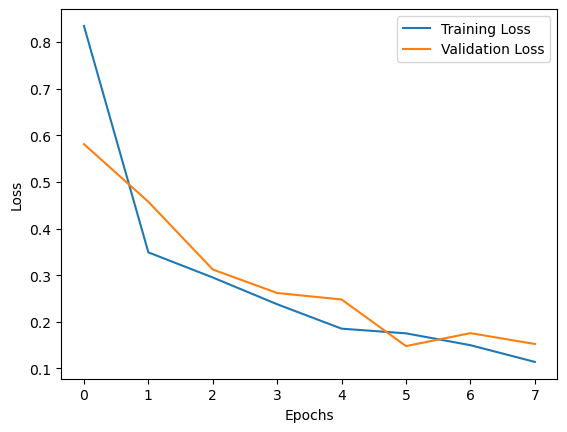

In [66]:
#RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape = (x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(len(speaker_folders), activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 20, batch_size= 32, callbacks = [Early_stopping])

if Early_stopping.stopped_epoch > 0:
    print("Early stopping triggered at epoch", Early_stopping.stopped_epoch + 1)
else:
    print("Training completed without early stopping")

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

11/11 [==============================] - 1s 13ms/step
Accuracy Score: 0.9644970414201184
Weighted F1 Score: 0.9645248921343329


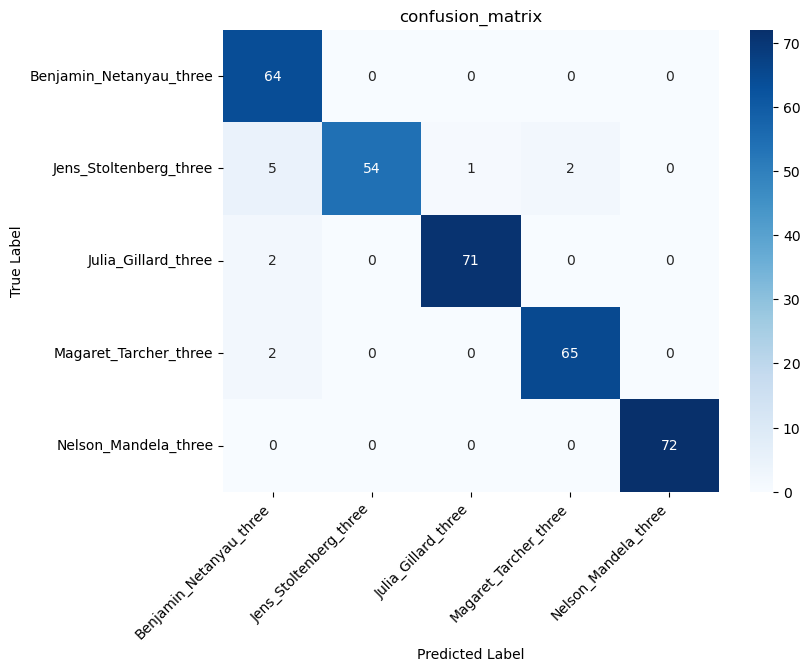

In [67]:
#evaluate the model on test set
y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

#decode labels back to original format
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

#creating a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels = speaker_folders)

#calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Accuracy Score: {accuracy}")

#F1 score
f1 = f1_score(y_test_decoded, y_pred_decoded, labels= speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1}")

#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels= speaker_folders, yticklabels=speaker_folders)

#rotate x-axis labels by 45 degree
plt.xticks(rotation= 45, ha= 'right')
plt.title("confusion_matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
len(y_pred)
print(y_pred)

[1 4 0 1 4 4 4 1 0 1 3 4 2 3 2 2 1 3 4 0 2 0 2 4 4 4 0 1 4 0 4 4 0 1 2 4 0
 0 0 3 0 0 2 1 4 2 2 4 4 2 3 0 1 0 4 3 1 3 1 2 3 2 4 2 3 0 0 2 0 4 0 0 4 1
 2 0 3 0 4 3 2 2 1 3 4 2 0 4 3 3 4 4 1 3 2 3 4 4 0 0 2 0 4 2 0 0 0 1 4 3 0
 0 4 2 1 0 4 1 3 3 3 1 2 0 4 2 3 3 0 4 4 0 2 3 2 4 4 2 2 0 3 0 2 2 0 0 2 4
 0 2 4 2 1 4 2 3 1 2 4 1 2 4 3 2 3 2 4 1 4 1 1 2 1 1 2 1 4 1 0 4 0 4 3 0 2
 1 1 4 1 3 3 3 3 2 0 0 2 2 1 0 3 3 4 4 0 0 1 2 3 4 1 1 0 2 0 3 2 2 3 2 3 2
 3 3 2 2 0 2 0 3 1 1 2 0 0 3 2 3 0 4 4 3 0 1 2 0 1 2 4 0 3 0 1 0 1 2 4 2 0
 1 2 3 2 0 2 0 1 4 3 0 2 2 0 4 4 3 3 3 4 2 1 3 2 3 2 1 1 0 3 3 4 0 4 2 4 3
 4 1 1 2 2 4 0 1 0 3 3 0 3 3 3 0 3 4 4 3 4 4 0 4 2 3 1 1 3 0 1 3 1 3 3 1 4
 0 4 4 2 4]


In [69]:
model.save('path_to_save_model_nine.h5')

c:\Users\acer\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
